## Simple Linear Regression Practical Implemention p-1

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
# Load Dataset
df = pd.read_csv(r"D:\Downloads\day.csv")

In [2]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [3]:
# Missing Values
df.isna().sum() 
#or df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [4]:
df.shape

(730, 12)

In [5]:
# describing the columns of dataframe

df.describe()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [6]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [8]:
# checking for the null values in column data

df.isnull().sum() #rename temp and atemp as well.

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [9]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
#df1 = df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'})

In [10]:
# Check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Copying the dataframe into new

df_copy = df.copy()

In [12]:
# dropping the duplicates

df_copy.drop_duplicates(inplace=True)
#df_copy2 = df_copy.drop_duplicates()

In [15]:
df_copy.shape

(730, 12)

In [16]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [18]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [19]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [7]:
#map - year, holiday, workingday

In [20]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


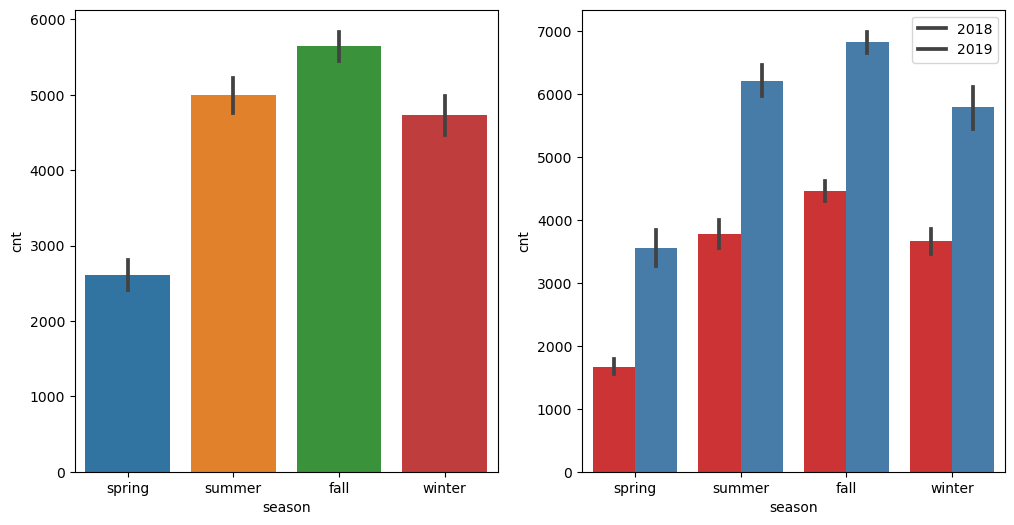

In [23]:
# plotting visualization for column
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x = column,y = 'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(x = column,y = 'cnt',data=df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()
plot_cat_columns('season')

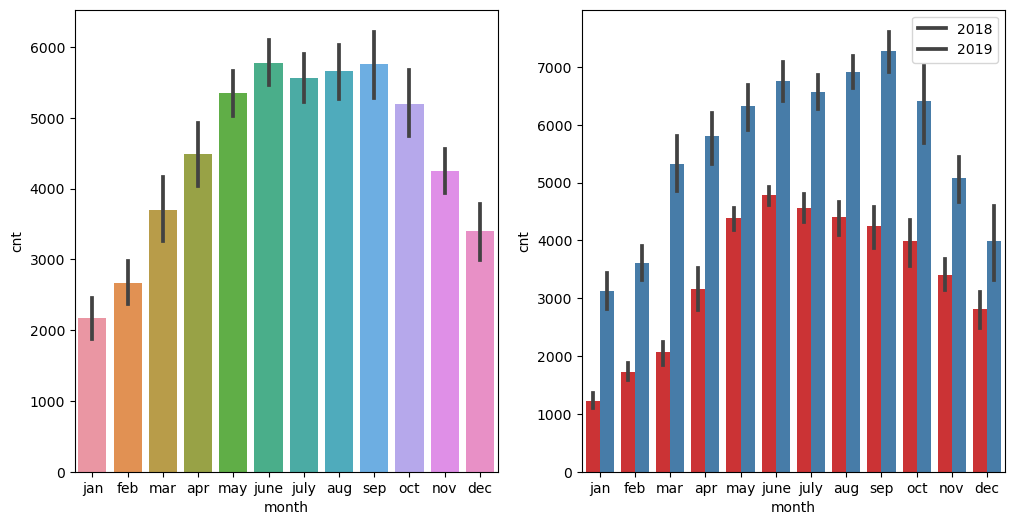

In [24]:
# plotting visualization for month column

plot_cat_columns('month')

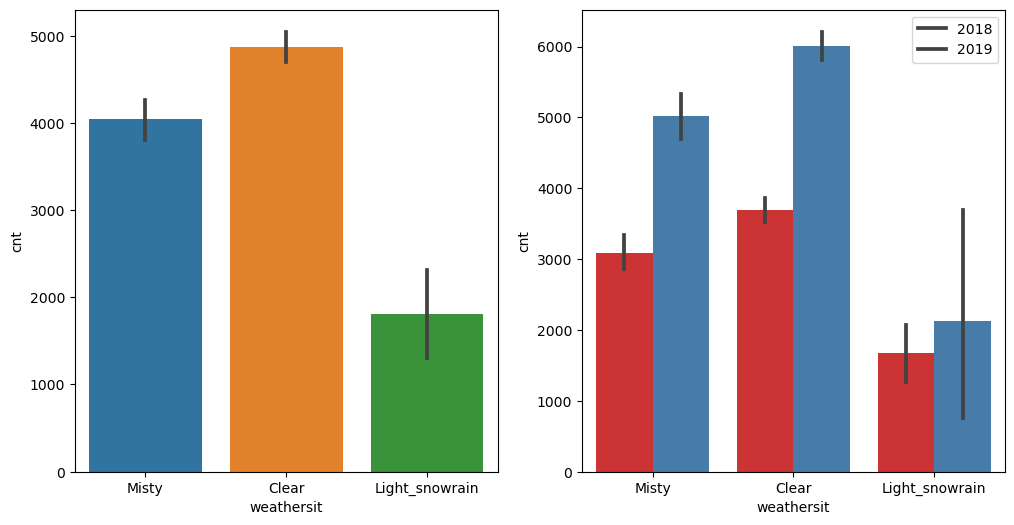

In [25]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

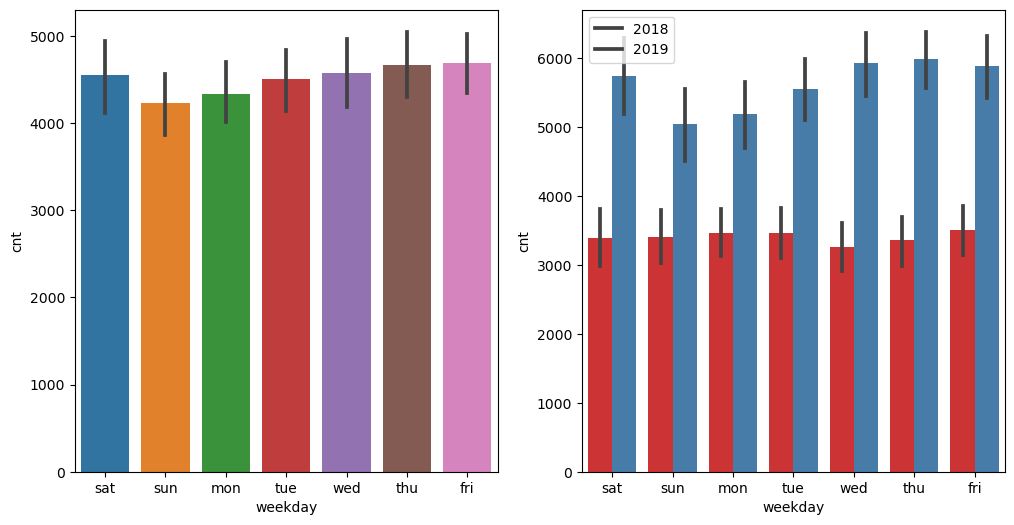

In [26]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

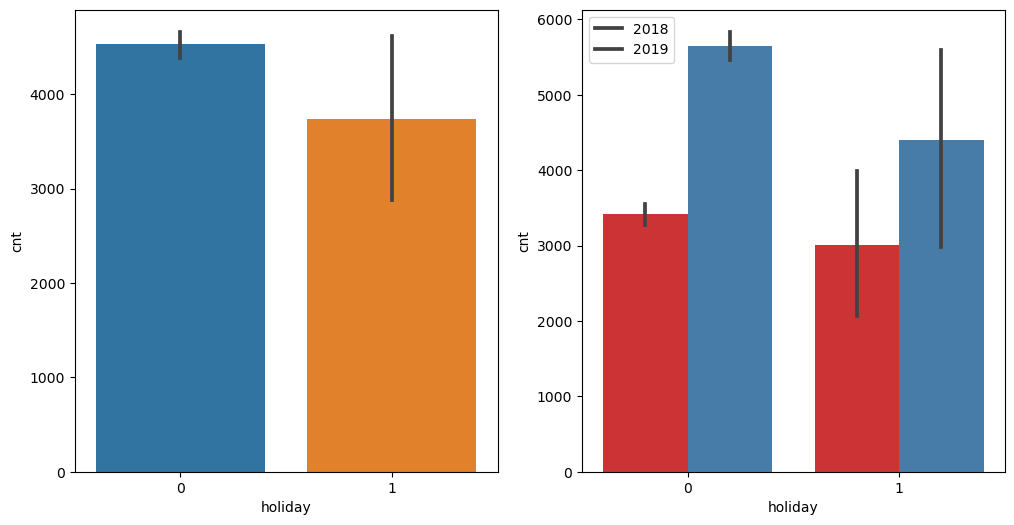

In [27]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

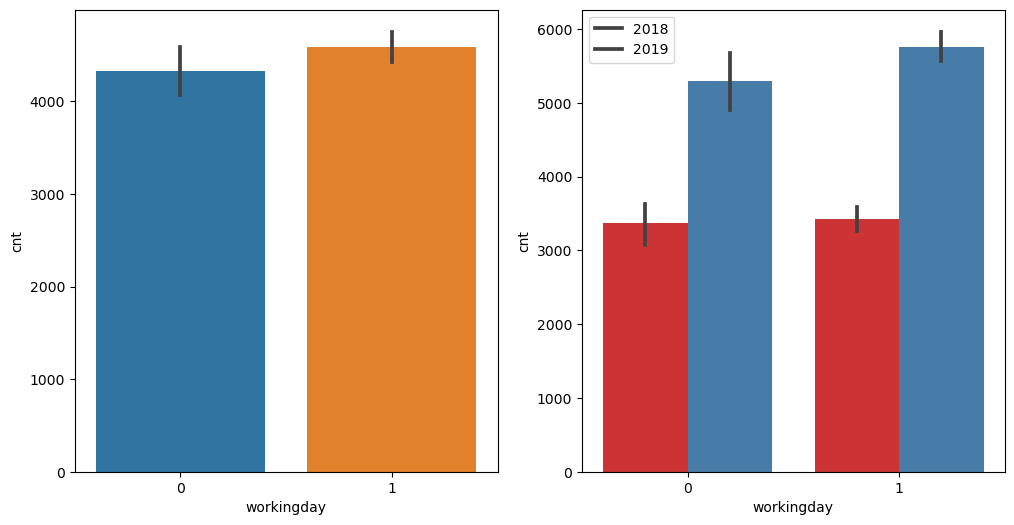

In [28]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

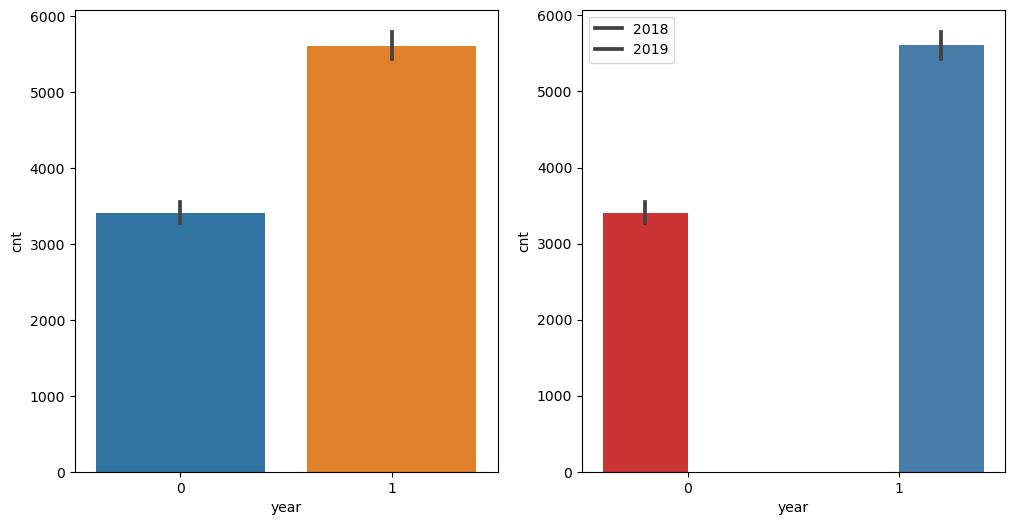

In [29]:
# plotting visualization for year column

plot_cat_columns('year')

In [30]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [31]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [33]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [34]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [35]:
# check the shape of new dataframe

df_new.shape

(730, 30)

In [36]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

In [37]:
x = df_new.drop(['cnt'],axis=1)
y = df_new['cnt']

In [8]:
#scale x using either standard/min max/robust

In [38]:
# splitting the dataframe into Train and Test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
regr = LinearRegression()

In [41]:
regr.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred = regr.predict(x_test)

In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [9]:
#add adjusted r2, rmse.

In [44]:
r2_score(y_test, y_pred)

0.811575957492425

In [49]:
mean_squared_error(y_test,y_pred)

600873.571124963

In [50]:
from sklearn.metrics import root_mean_squared_error

In [51]:
root_mean_squared_error(y_test,y_pred)

775.1603518788631

In [46]:
mean_absolute_error(y_test,y_pred)

566.9532479996614

In [47]:
mean_absolute_percentage_error(y_test,y_pred)

0.17429173539417975

In [ ]:
# - instant: record index (no need)
# - dteday : date (no need)
# - season : season (1:winter, 2:spring, 3:summer, 4:fall)
# - yr : year (0: 2011, 1:2012)
# - mnth : month ( 1 to 12)
# - hr : hour (0 to 23)
# - holiday : whether day is holiday or not (extracted from [Web Link])
# - weekday : day of the week
# - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# + weathersit :
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
# - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
# - hum: Normalized humidity. The values are divided to 100 (max)
# - windspeed: Normalized wind speed. The values are divided to 67 (max)
# - casual: count of casual users (no need)
# - registered: count of registered users (no need)
# - cnt: count of total rental bikes including both casual and registered ( y variable)